<a href="https://colab.research.google.com/github/samuel-charadias/Trabalho-PCA/blob/main/Trabalho_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

df = heart_disease.data.features
y = heart_disease.data.targets


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [ ]:
# Verificando valores nulos
df.duplicated().sum()
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Substituindo valores nulos
def handle_missing_values(df):
    num_cols = ['trestbps', 'chol', 'thal', 'oldpeak']
    for col in num_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())

    cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    for col in cat_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

df_clean = handle_missing_values(df)

<ipython-input-9-0bed389707f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
<ipython-input-9-0bed389707f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
print(df_clean.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [ ]:
# Vendo o tipo do dado
df_clean['exang'] = df_clean['exang'].fillna(df_clean['exang'].mode()[0])

df_clean['exang'] = df_clean['exang'].astype(int)

data_types_updated = df_clean.dtypes
nan_check_updated = df_clean['exang'].isnull().sum()

data_types_updated, nan_check_updated

<ipython-input-11-519661101222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['exang'] = df_clean['exang'].fillna(df_clean['exang'].mode()[0])
<ipython-input-11-519661101222>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['exang'] = df_clean['exang'].astype(int)


(age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca          float64
 thal        float64
 dtype: object,
 0)

In [ ]:
df['num'] = y

In [ ]:
numerical_data = df_clean.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()

target_correlation = correlation_matrix['num'].sort_values(ascending=False)
print(target_correlation)

num         1.000000
ca          0.520968
thal        0.508799
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64


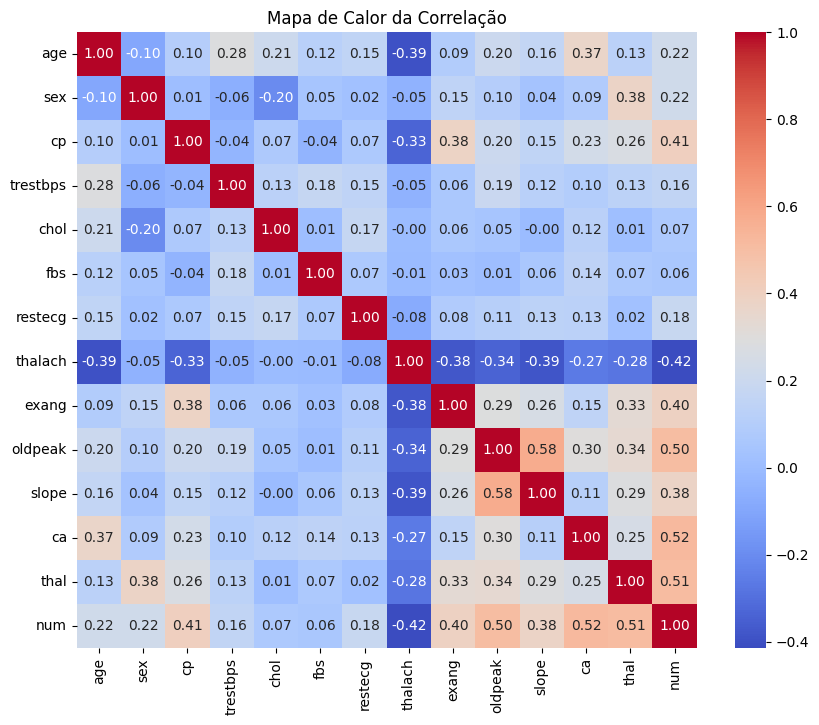

In [ ]:
numerical_data = df_clean.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Visualizando a matriz de correlação como um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor da Correlação')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in df_clean.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le


X = df_clean.drop('num', axis=1)
y = df_clean['num']


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                    'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

print(feature_importance)

     Feature  Importance
7    thalach    0.134800
9    oldpeak    0.119545
4       chol    0.117623
0        age    0.114522
11        ca    0.098158
3   trestbps    0.093153
12      thal    0.080083
2         cp    0.074262
8      exang    0.048741
10     slope    0.044281
1        sex    0.028124
6    restecg    0.027945
5        fbs    0.018764


In [ ]:
from sklearn.decomposition import PCA


# Padronização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean.drop('num', axis=1))

# Reter 95% da variância
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

print("Number of components:", pca.n_components_)

Number of components: 12


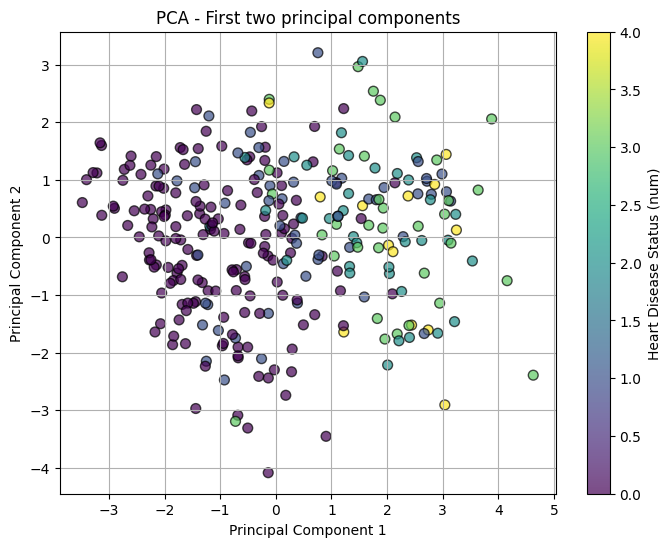

In [ ]:
# Gráfico de disperção dos dois primeiros componentes
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_clean['num'], edgecolor='k', alpha=0.7, s=50, cmap='viridis')
plt.title('PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Heart Disease Status (num)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


features = ['age', 'chol', 'cp', 'trestbps', 'thal', 'exang']
X = df[features]

# Escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variância explicada
variance_explained = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(variance_explained)

# Exibir variância explicada
print('Variância explicada por componente:')
for i, var_exp in enumerate(variance_explained):
    print(f'PC{i+1}: {var_exp:.2f}%')




Variância explicada por componente:
PC1: 29.77%
PC2: 21.70%
PC3: 15.53%
PC4: 12.12%
PC5: 11.13%
PC6: 9.76%


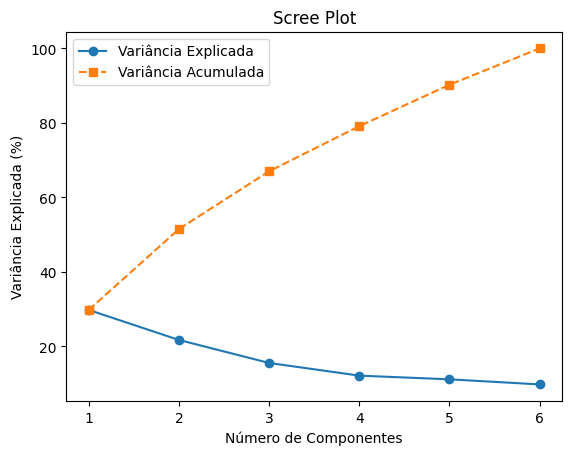

In [ ]:
plt.figure()
plt.plot(range(1, len(variance_explained)+1), variance_explained, 'o-', label='Variância Explicada')
plt.plot(range(1, len(variance_explained)+1), cumulative_variance, 's--', label='Variância Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada (%)')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
print(loadings)

               PC1       PC2       PC3       PC4       PC5       PC6
age       0.365314  0.502655 -0.020137  0.688599  0.268570  0.259190
chol      0.235876  0.421676  0.742144 -0.449096  0.116894 -0.020561
cp        0.476008 -0.364849  0.278680  0.342312 -0.209993 -0.633533
trestbps  0.275376  0.545735 -0.484433 -0.256624 -0.487011 -0.297708
thal      0.487882 -0.192927 -0.368599 -0.354175  0.673520 -0.099078
exang     0.520060 -0.318379  0.024771 -0.125185 -0.423439  0.657713


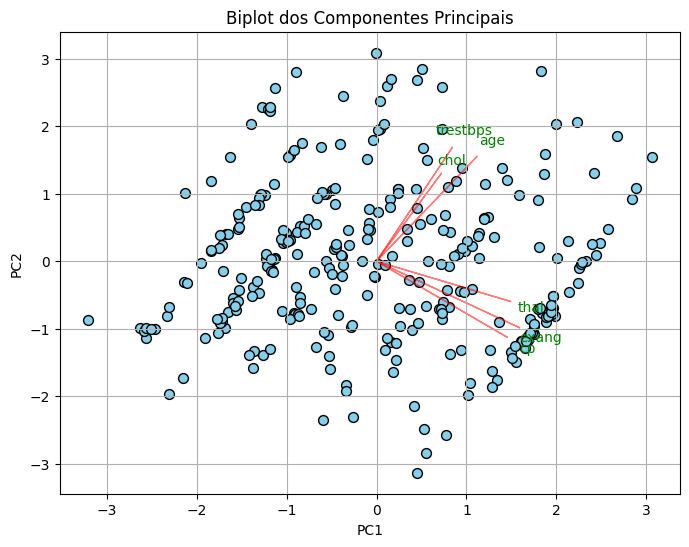

In [ ]:
# Biplot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', edgecolors='k', s=50)
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i, 0] * max(X_pca[:, 0]), loadings.iloc[i, 1] * max(X_pca[:, 1]),
              color='r', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * max(X_pca[:, 0]) * 1.15, loadings.iloc[i, 1] * max(X_pca[:, 1]) * 1.15,
             var, color='g', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot dos Componentes Principais')
plt.grid()
plt.show()